Text(0.5, 1.0, 'Original Image')

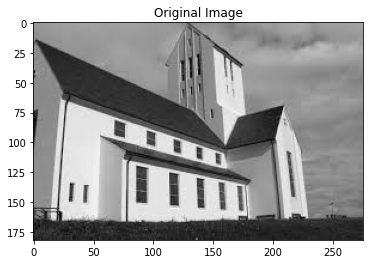

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import math
image = cv2.imread('image1.jfif')
plt.imshow(image)
plt.title('Original Image')

In [2]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #Converting image to graysacale image
sigma=1
image = cv2.GaussianBlur(image, (5, 5), sigma) #reducting noice, kernelsize 5 X 5 
gradientx = cv2.Sobel(np.float32(image), cv2.CV_64F, 1, 0, 3) #calculating x derivative of image
gradienty = cv2.Sobel(np.float32(image), cv2.CV_64F, 0, 1, 3) ##calculating y derivative of image
magnitude, angle = cv2.cartToPolar(gradientx, gradienty, angleInDegrees = True) #magnitude and angle calculation
#Fining minimum and maximum threshold
max_magnitude = np.max(magnitude)
lowTh = None
highTh = None
lowTh = max_magnitude * 0.1
highTh = max_magnitude * 0.5    
height = image.shape[0]   
width = image.shape[1]    

In [3]:
#Now will go through each pixel of image
for i in range(width):
    for j in range(height):
        gradientAng = angle[j, i]
        gradientAng = abs(gradientAng-180) if abs(gradientAng)>180 else abs(gradientAng)
        
# Following the gradient direction selecting the neighbours of the target pixel    
        if gradientAng<= 22.5:
            first_neighbx=i-1
            first_neighby = j
            second_neighbx=i+1
            second_neighby=j

        elif gradientAng>22.5 and gradientAng<=(22.5 + 45):
            first_neighbx=i-1
            first_neighby = j-1
            second_neighbx=i+1
            second_neighby=j+1
        elif gradientAng>(22.5 + 45) and gradientAng<=(22.5 + 90):
            first_neighbx=i
            first_neighby = j-1
            second_neighbx=i
            second_neighby=j+1
        elif gradientAng>(22.5 + 90) and gradientAng<=(22.5 + 135):
            first_neighbx=i-1
            first_neighby = j+1
            second_neighbx=i+1
            second_neighby=j-1
            
        elif gradientAng>(22.5 + 135) and gradientAng<=(22.5 + 180):
            first_neighbx=i-1
            first_neighby = j
            second_neighbx=i+1
            second_neighby=j               
# Doing Non-maximum Suppression
        if width>first_neighbx>= 0 and height>first_neighby>= 0:
            if magnitude[j, i]<magnitude[first_neighby, first_neighbx]:
                    magnitude[j, i]= 0
                    continue

        if width>second_neighbx>= 0 and height>second_neighby>= 0:
             if magnitude[j, i]<magnitude[second_neighby, second_neighbx]:
                    magnitude[j, i]= 0



Text(0.5, 1.0, 'Implementation of Canny Edge Detection Algorithm')

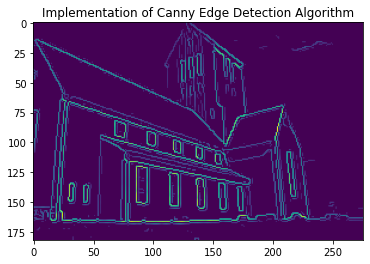

In [4]:
# double thresholding
for i in range(width):
    for j in range(height):

        gradientMagnitude = magnitude[j, i]

        if gradientMagnitude<lowTh:
                magnitude[j, i]= 0
                
Canny_Detector_image= magnitude
plt.imshow(Canny_Detector_image)
plt.title('Implementation of Canny Edge Detection Algorithm')

Text(0.5, 1.0, 'Gaussian convolution as a separable sequence of horizontal and vertical convolutions. ')

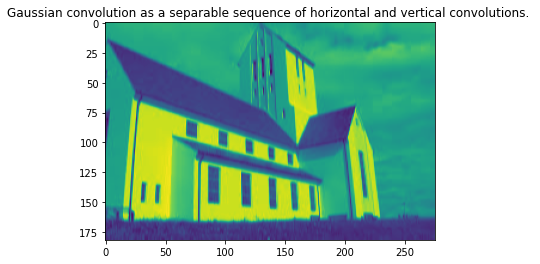

In [5]:
#Taking image input 
image = cv2.imread('image1.jfif') 
#Converting image to gray scale image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sigma=1
size=3

#Creating a one dimensional gaussian filter for horizontal convolution with 3 componenet
kernel_horizontal = np.fromfunction(lambda x: math.e ** ((-1*(x-(size-1)/2)**2) / (2*sigma**2)), (size,))
kernel_horizontal_x= kernel_horizontal / np.sum(kernel_horizontal)

#Creating a one dimensional gaussian filter for vertical convolution
kernel_horizontal_y = kernel_horizontal_x.reshape(-1,1)

#Horizontal Convolution
horizontal_convo = cv2.filter2D(grayImage,-1,kernel_horizontal_x) 
#Vertical Convolution
final_vertical_convo = cv2.filter2D(horizontal_convo,-1,kernel_horizontal_y)

plt.imshow(final_vertical_convo)
plt.title('Gaussian convolution as a separable sequence of horizontal and vertical convolutions. ')

(<matplotlib.image.AxesImage at 0x291859bdf00>,
 Text(0.5, 1.0, 'Implementing Harris Corner Detection algorithm'))

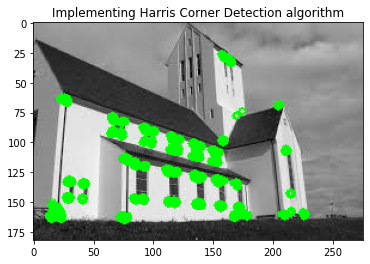

In [6]:
    image = cv2.imread("image1.jfif")
    sizeOfwindow=5
    k=0.04
    Threshold=0.30
    #converting to grayscale image
    grayscale_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #applying Gaussian Blur
    Gaussian_Image = cv2.GaussianBlur(grayscale_image,(3,3),0)
        
    height=image.shape[0]
    width = image.shape[1]
    matrixR = np.zeros((height,width))
    # Spatial Derivative calculation
    derivativeX = cv2.Sobel(Gaussian_Image, cv2.CV_64F, 1, 0, ksize=3)
    derivativeY = cv2.Sobel(Gaussian_Image, cv2.CV_64F, 0, 1, ksize=3)
    
    derivativeXY=derivativeX*derivativeY
    derivativeX2=np.square(derivativeX)
    derivativeY2=np.square(derivativeY)
    offset = int( sizeOfwindow / 2 )
    
    # For each pixel, will sum the last step obtained derivatives.
  
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sumx2 = np.sum(derivativeX2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sumy2 = np.sum(derivativeY2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sumxy = np.sum(derivativeXY[y-offset:y+1+offset, x-offset:x+1+offset])
            H_mat = np.array([[Sumx2,Sumxy],[Sumxy,Sumy2]])#For each pixel using the sums of the previous step defining H matrix

     #Corner response calculation
            determinant=np.linalg.det(H_mat)
            tracee=np.matrix.trace(H_mat)
            R=determinant-k*(tracee**2)
            matrixR[y-offset, x-offset]=R
    #Threshold applying
    cv2.normalize(matrixR, matrixR, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrixR[y, x]
            if value>Threshold:
                cv2.circle(image,(x,y),3,(0,255,0))
                
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Implementing Harris Corner Detection algorithm")

